In [ ]:
#pip install opencv-python

In [2]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
path_to_cr_data = r"C:/Users/saibo/Downloads/archive/cropped_images"

In [4]:
import os
img_dirs = []
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [5]:
#Getting the face detector xml
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [6]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [7]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + "/" + celebrity_name ######################
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            #cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

chris_evans
chris_hemsworth
mark_ruffalo
robert_downey_jr
scarlett_johansson


In [8]:
celebrity_name

'scarlett_johansson'

In [9]:
celebrity_file_names_dict.keys()

dict_keys(['chris_evans', 'chris_hemsworth', 'mark_ruffalo', 'robert_downey_jr', 'scarlett_johansson'])

In [10]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'chris_evans': 0,
 'chris_hemsworth': 1,
 'mark_ruffalo': 2,
 'robert_downey_jr': 3,
 'scarlett_johansson': 4}

In [11]:
class_dict[celebrity_name] -1

3

In [12]:
celebrity_file_names_dict.items()

dict_items([('chris_evans', ['C:/Users/saibo/Downloads/archive/cropped_images/chris_evans/chris_evans1.png', 'C:/Users/saibo/Downloads/archive/cropped_images/chris_evans/chris_evans2.png', 'C:/Users/saibo/Downloads/archive/cropped_images/chris_evans/chris_evans3.png', 'C:/Users/saibo/Downloads/archive/cropped_images/chris_evans/chris_evans4.png', 'C:/Users/saibo/Downloads/archive/cropped_images/chris_evans/chris_evans5.png', 'C:/Users/saibo/Downloads/archive/cropped_images/chris_evans/chris_evans6.png', 'C:/Users/saibo/Downloads/archive/cropped_images/chris_evans/chris_evans7.png', 'C:/Users/saibo/Downloads/archive/cropped_images/chris_evans/chris_evans8.png', 'C:/Users/saibo/Downloads/archive/cropped_images/chris_evans/chris_evans9.png', 'C:/Users/saibo/Downloads/archive/cropped_images/chris_evans/chris_evans10.png', 'C:/Users/saibo/Downloads/archive/cropped_images/chris_evans/chris_evans11.png', 'C:/Users/saibo/Downloads/archive/cropped_images/chris_evans/chris_evans12.png', 'C:/User

In [13]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        print(img)
        scalled_raw_img = cv2.resize(img, (64, 64))
        #img_har = w2d(img,'db1',5)
        #scalled_img_har = cv2.resize(img_har, (32, 32))
        #combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(scalled_raw_img)
        y.append(class_dict[celebrity_name])    

[[[ 25  28  36]
  [ 10  13  21]
  [ 28  30  40]
  ...
  [ 93  90  85]
  [122 120 112]
  [113 111 103]]

 [[ 13  19  24]
  [ 23  29  34]
  [ 36  42  49]
  ...
  [ 65  63  62]
  [109 108 104]
  [116 116 110]]

 [[  7  14  17]
  [ 15  21  26]
  [ 26  32  37]
  ...
  [ 60  60  60]
  [111 109 108]
  [113 112 108]]

 ...

 [[118 116 108]
  [118 116 108]
  [118 116 108]
  ...
  [110 113 104]
  [110 113 104]
  [109 112 103]]

 [[119 117 109]
  [119 117 109]
  [119 117 109]
  ...
  [110 113 104]
  [109 112 103]
  [109 112 103]]

 [[119 117 109]
  [119 117 109]
  [119 117 109]
  ...
  [110 113 104]
  [110 113 104]
  [109 112 103]]]
[[[ 76  84 113]
  [  0   0  25]
  [  3   2  28]
  ...
  [ 31  61 202]
  [ 34  63 191]
  [ 38  62 184]]

 [[ 95 106 134]
  [  2   5  33]
  [  4   3  29]
  ...
  [ 30  63 202]
  [ 33  65 190]
  [ 37  64 184]]

 [[114 125 152]
  [ 28  31  59]
  [ 10   9  35]
  ...
  [ 29  62 201]
  [ 32  65 188]
  [ 36  63 183]]

 ...

 [[  0   4   7]
  [  3   6   4]
  [  0   3   1]
  ..

[[[148 143 145]
  [148 143 145]
  [148 143 145]
  ...
  [  2   5  13]
  [  2   5  10]
  [  0   3   8]]

 [[149 144 146]
  [149 144 146]
  [149 144 146]
  ...
  [  3   6  14]
  [  3   6  11]
  [  1   4   9]]

 [[151 146 148]
  [151 146 148]
  [151 146 148]
  ...
  [  4   7  15]
  [  3   6  11]
  [  2   5  10]]

 ...

 [[ 99 113 125]
  [ 99 113 125]
  [ 99 113 125]
  ...
  [ 23  14  11]
  [ 24  15  12]
  [ 26  17  14]]

 [[ 98 113 122]
  [ 98 113 122]
  [ 99 114 123]
  ...
  [ 23  14  11]
  [ 24  15  12]
  [ 26  17  14]]

 [[ 97 112 121]
  [ 97 112 121]
  [ 98 113 122]
  ...
  [ 23  14  11]
  [ 24  15  12]
  [ 26  17  14]]]
[[[ 54  66  72]
  [ 47  59  65]
  [ 41  53  59]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 44  56  62]
  [ 41  53  59]
  [ 40  52  58]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 35  47  53]
  [ 36  48  54]
  [ 40  52  58]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

[[[ 69  78  92]
  [100 114 126]
  [ 67  83  95]
  ...
  [ 24  34  41]
  [ 19  30  38]
  [ 18  31  39]]

 [[ 96 105 119]
  [ 91 105 117]
  [ 83  99 112]
  ...
  [ 23  33  40]
  [ 23  34  42]
  [ 18  31  39]]

 [[109 118 132]
  [109 125 138]
  [ 91 108 121]
  ...
  [ 20  30  37]
  [ 36  47  55]
  [ 25  38  46]]

 ...

 [[173 242 252]
  [171 240 255]
  [171 240 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[173 242 252]
  [171 240 255]
  [171 240 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[173 242 252]
  [171 240 255]
  [170 241 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[  6  19  41]
  [ 11  25  47]
  [ 10  22  46]
  ...
  [ 60  70  80]
  [ 38  44  55]
  [ 27  34  43]]

 [[  7  20  42]
  [ 12  26  48]
  [ 11  23  47]
  ...
  [ 81  91 101]
  [ 72  78  89]
  [ 52  58  69]]

 [[  6  19  41]
  [ 11  24  46]
  [ 14  26  50]
  ...
  [ 89  98 111]
  [102 110 123]
  [ 77  83  94]]

 ...

 [[170 175 178]
  [170 175 178]
  [171 176 179]
  ..

[[[ 58  62  73]
  [ 75  80  89]
  [ 53  57  68]
  ...
  [ 32  42  59]
  [ 32  45  61]
  [ 44  57  73]]

 [[ 57  57  71]
  [ 64  64  76]
  [ 11  11  25]
  ...
  [ 78  85 100]
  [ 44  51  66]
  [ 56  63  78]]

 [[ 22  19  34]
  [ 31  28  43]
  [ 21  18  33]
  ...
  [ 47  52  67]
  [ 43  48  63]
  [ 40  45  60]]

 ...

 [[105  86  79]
  [ 87  65  54]
  [123  94  80]
  ...
  [125 139 158]
  [127 141 160]
  [130 144 163]]

 [[ 99  78  70]
  [ 86  60  48]
  [179 146 131]
  ...
  [126 140 159]
  [128 142 161]
  [131 145 164]]

 [[ 88  66  55]
  [133 103  92]
  [228 193 179]
  ...
  [126 140 159]
  [128 142 161]
  [131 145 164]]]
[[[106 115 112]
  [123 132 129]
  [156 165 162]
  ...
  [ 79  81  81]
  [ 62  66  67]
  [ 97 100 104]]

 [[112 121 118]
  [110 119 116]
  [158 167 164]
  ...
  [112 118 117]
  [ 96 102 101]
  [ 73  78  79]]

 [[ 98 107 104]
  [110 119 116]
  [154 163 160]
  ...
  [ 41  49  48]
  [ 64  72  71]
  [ 87  95  94]]

 ...

 [[ 27  22  21]
  [ 26  21  20]
  [ 26  21  20]
  ..

  [ 52  50  50]]]
[[[ 16  16  16]
  [  9   9   9]
  [  8   8   8]
  ...
  [ 13  16  21]
  [ 26  28  36]
  [ 13  15  23]]

 [[ 17  17  17]
  [ 21  21  21]
  [ 23  23  23]
  ...
  [ 17  20  25]
  [ 18  20  28]
  [ 16  18  26]]

 [[ 18  18  18]
  [ 35  35  35]
  [ 19  19  19]
  ...
  [ 23  26  31]
  [ 12  14  22]
  [ 16  18  26]]

 ...

 [[  4   2   1]
  [  4   2   1]
  [  7   5   4]
  ...
  [129 134 132]
  [125 132 129]
  [122 129 126]]

 [[  6   2   1]
  [  5   3   2]
  [ 19  17  16]
  ...
  [129 134 132]
  [124 131 128]
  [121 128 125]]

 [[  9   5   4]
  [  9   5   4]
  [ 29  25  24]
  ...
  [128 134 129]
  [123 130 125]
  [119 126 121]]]
[[[ 26  32  39]
  [ 27  33  40]
  [ 23  29  36]
  ...
  [ 57  52  49]
  [ 57  52  49]
  [ 56  51  48]]

 [[ 20  26  33]
  [ 26  32  39]
  [ 31  37  44]
  ...
  [ 58  53  50]
  [ 57  52  49]
  [ 56  51  48]]

 [[ 35  41  48]
  [ 31  37  44]
  [ 37  43  50]
  ...
  [ 57  52  49]
  [ 56  51  48]
  [ 56  51  48]]

 ...

 [[247 247 253]
  [249 247 253]
  

  [ 41  61  56]]]
[[[ 39  39  45]
  [ 25  25  31]
  [ 24  26  34]
  ...
  [ 35  36  46]
  [ 22  23  33]
  [ 13  12  21]]

 [[ 14  14  20]
  [ 25  28  33]
  [ 20  22  30]
  ...
  [ 39  40  50]
  [ 26  27  37]
  [ 14  16  24]]

 [[ 13  13  19]
  [  7  10  15]
  [ 13  16  21]
  ...
  [ 48  47  57]
  [ 44  45  55]
  [ 32  34  42]]

 ...

 [[ 34  26  26]
  [ 40  32  32]
  [ 46  38  38]
  ...
  [ 44  82 106]
  [ 45  86 109]
  [ 50  91 114]]

 [[ 38  30  30]
  [ 46  38  38]
  [ 49  41  41]
  ...
  [ 46  84 108]
  [ 48  89 112]
  [ 52  93 116]]

 [[ 42  34  34]
  [ 50  42  42]
  [ 49  41  41]
  ...
  [ 49  87 111]
  [ 51  92 115]
  [ 55  96 119]]]
[[[103  96 103]
  [ 78  71  78]
  [ 95  88  95]
  ...
  [171 163 156]
  [171 161 154]
  [169 160 151]]

 [[106 100 105]
  [ 46  40  45]
  [ 90  84  89]
  ...
  [170 162 155]
  [170 160 153]
  [168 159 150]]

 [[102  97  99]
  [ 98  93  95]
  [ 80  77  79]
  ...
  [170 162 155]
  [170 160 153]
  [168 159 150]]

 ...

 [[  3   4   2]
  [  3   4   2]
  

[[[220 219 229]
  [217 218 228]
  [216 217 227]
  ...
  [214 208 227]
  [214 208 225]
  [208 206 218]]

 [[220 219 229]
  [217 218 228]
  [216 217 227]
  ...
  [213 207 224]
  [213 207 224]
  [208 206 218]]

 [[220 219 229]
  [217 218 228]
  [216 217 227]
  ...
  [209 206 222]
  [213 208 223]
  [208 206 218]]

 ...

 [[ 26  12  48]
  [ 31  21  63]
  [ 26  19  62]
  ...
  [242 238 243]
  [244 240 245]
  [244 242 248]]

 [[ 27  13  47]
  [ 23  13  55]
  [ 21  14  57]
  ...
  [241 237 242]
  [243 239 244]
  [237 235 241]]

 [[ 22  10  40]
  [ 31  22  62]
  [ 29  20  63]
  ...
  [238 234 239]
  [238 234 239]
  [233 231 237]]]
[[[ 23  31  35]
  [ 23  31  35]
  [ 23  31  35]
  ...
  [230 231 230]
  [234 239 238]
  [230 231 230]]

 [[ 38  46  48]
  [ 50  61  65]
  [ 50  61  65]
  ...
  [234 239 238]
  [234 239 238]
  [234 239 238]]

 [[ 38  46  48]
  [ 38  46  48]
  [ 38  46  48]
  ...
  [234 239 238]
  [230 231 230]
  [230 231 230]]

 ...

 [[234 239 238]
  [143 182 223]
  [107 147 188]
  ..

  [244 245 243]]]
[[[136 162 186]
  [154 185 208]
  [170 205 225]
  ...
  [153 225 255]
  [153 225 255]
  [153 225 255]]

 [[150 177 203]
  [158 189 212]
  [167 200 219]
  ...
  [153 225 255]
  [153 225 255]
  [153 225 255]]

 [[172 199 225]
  [168 199 222]
  [164 196 215]
  ...
  [153 225 255]
  [153 225 255]
  [153 225 255]]

 ...

 [[255 240 224]
  [255 240 224]
  [255 239 223]
  ...
  [120 207 247]
  [120 207 247]
  [120 207 247]]

 [[254 241 225]
  [255 240 224]
  [255 240 224]
  ...
  [119 206 246]
  [119 206 246]
  [119 206 246]]

 [[254 241 225]
  [254 241 225]
  [255 240 224]
  ...
  [119 206 246]
  [119 206 246]
  [119 206 246]]]
[[[243 245 246]
  [234 240 247]
  [241 253 255]
  ...
  [199 208 218]
  [240 247 255]
  [228 234 241]]

 [[243 245 246]
  [241 250 255]
  [206 220 238]
  ...
  [204 218 230]
  [204 213 226]
  [232 241 250]]

 [[242 244 245]
  [242 251 255]
  [170 184 202]
  ...
  [212 226 238]
  [171 180 193]
  [234 243 252]]

 ...

 [[246 244 244]
  [246 244 244]
  

[[[ 26  29  33]
  [ 25  28  32]
  [ 23  26  30]
  ...
  [ 47  49  49]
  [ 40  42  42]
  [ 27  32  31]]

 [[ 28  28  34]
  [ 28  29  33]
  [ 28  29  33]
  ...
  [ 56  59  57]
  [ 33  36  34]
  [ 17  19  19]]

 [[ 27  27  33]
  [ 27  27  33]
  [ 28  29  33]
  ...
  [ 50  54  49]
  [ 28  29  27]
  [ 16  17  15]]

 ...

 [[142 147 150]
  [145 148 152]
  [147 150 154]
  ...
  [ 20  27  30]
  [ 23  28  29]
  [ 25  30  31]]

 [[138 145 148]
  [141 146 149]
  [144 149 152]
  ...
  [ 20  28  28]
  [ 21  26  27]
  [ 20  25  26]]

 [[135 142 145]
  [139 144 147]
  [141 146 149]
  ...
  [ 22  30  30]
  [ 19  27  27]
  [ 20  26  25]]]
[[[210 237 251]
  [210 236 250]
  [213 234 249]
  ...
  [ 54  72  95]
  [ 58  76  99]
  [ 58  76  99]]

 [[212 240 251]
  [212 238 250]
  [216 238 250]
  ...
  [ 39  57  80]
  [ 52  70  93]
  [ 56  74  97]]

 [[212 241 248]
  [214 239 249]
  [221 237 249]
  ...
  [ 48  69  91]
  [ 50  71  93]
  [ 45  63  86]]

 ...

 [[ 68 192 240]
  [ 68 192 240]
  [ 68 192 240]
  ..

In [14]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

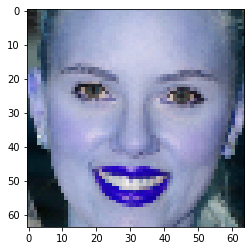

In [15]:
plt.imshow(X[190])

In [16]:
X= np.array(X)
y= np.array(y)
X.shape , y.shape

((196, 64, 64, 3), (196,))

In [17]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, train_size= 0.9 ,random_state=0)
X_train_orig.shape

(176, 64, 64, 3)

 ## Using Facenet to get embeddings

In [18]:
#!pip install tensorflow
import tensorflow as tf

In [19]:
#!pip install keras-facenet
from keras_facenet import FaceNet
embedder = FaceNet()

In [20]:
X_train = embedder.embeddings(X_train_orig)
X_test = embedder.embeddings(X_test_orig)
print('Train embed shape=',X_train.shape)
print('Test embed shape=',X_test.shape)

1/1 [==============================] - 1s 1s/step
Train embed shape= (176, 512)
Test embed shape= (20, 512)


In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
model.score(X_test, y_test)

1.0

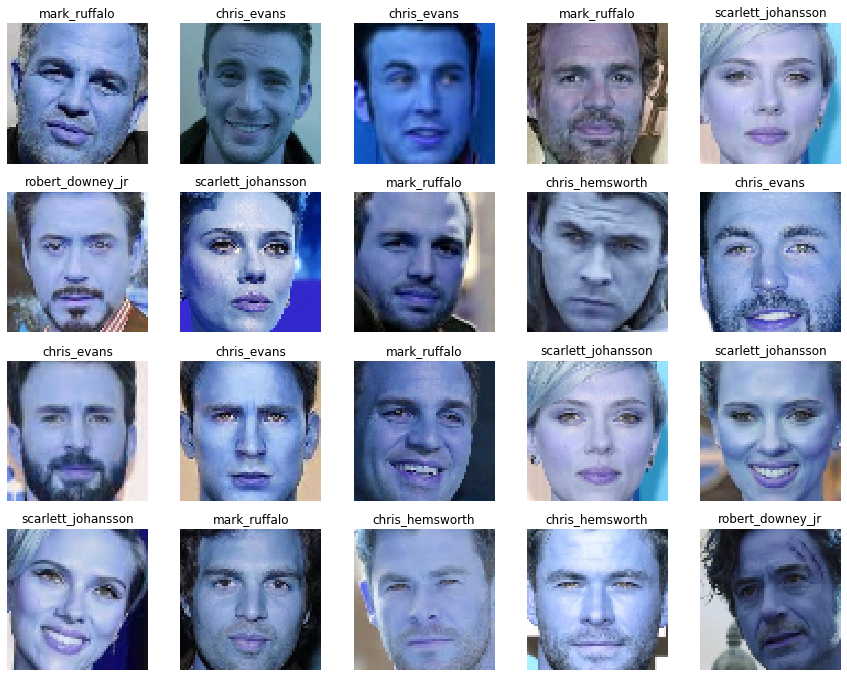

In [23]:
classes= ['chris_evans',
 'chris_hemsworth',
 'mark_ruffalo',
 'robert_downey_jr',
 'scarlett_johansson']

y_pred= model.predict(X_test)


plt.figure(figsize=(15,15))
for i in range(0,len(y_test)):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test_orig[i])
    plt.axis('off')
    plt.title(classes[y_pred[i]])

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

